In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import datetime
# import copy
import scipy.io as sio

In [2]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


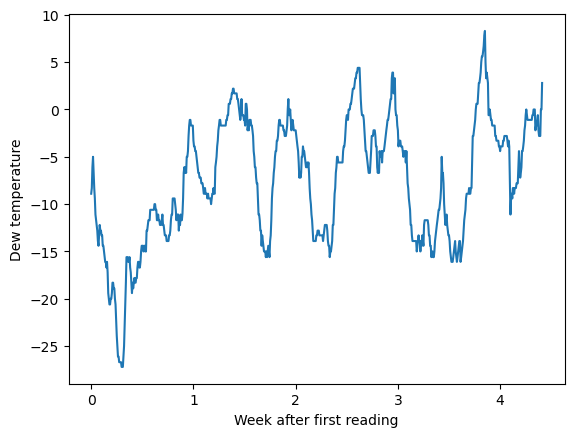

In [3]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

In [4]:
def packX(z, poly_order):
    X = np.zeros((len(z), poly_order + 1))
    for i in range(len(X)):
        for j in range(len(X[i])):
            X[i][j] = z[i]**j
    return X


def solveLinearSystem(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)


# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100), 3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X, y)
print('Check number: ', np.sum(theta))


Check number:  1.341270179610469


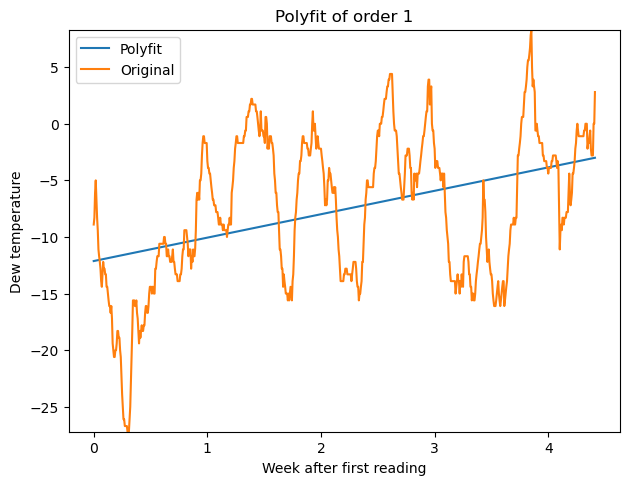

164.30329523580005
Error for order 1: 164.30329523580005


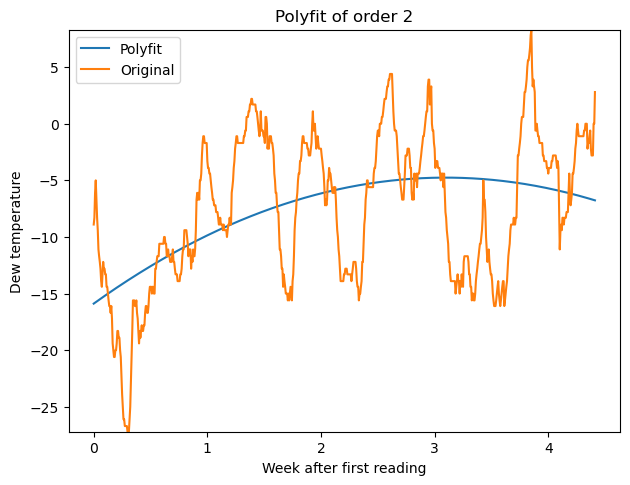

157.73596448353968
Error for order 2: 157.73596448353968


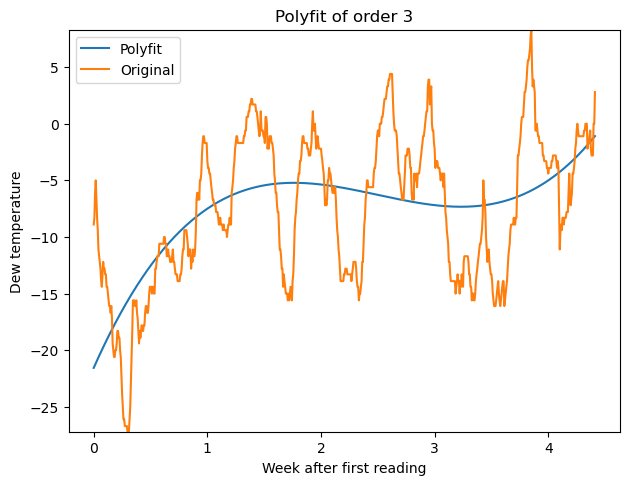

146.33215307135706
Error for order 3: 146.33215307135706


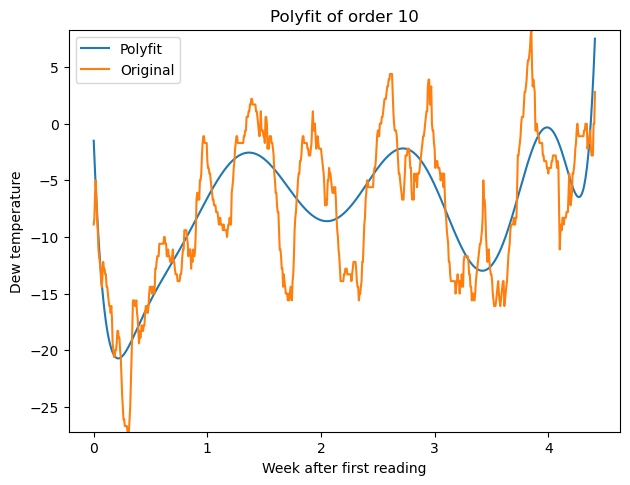

111.33952670636837
Error for order 10: 111.33952670636837


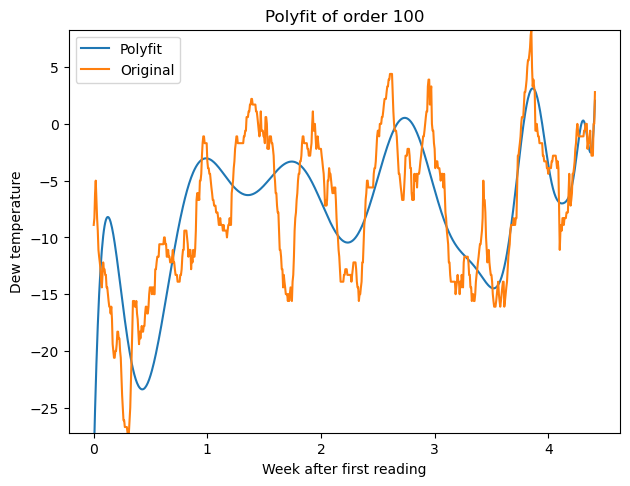

129.26825672772424
Error for order 100: 129.26825672772424
Lowest error: 111.33952670636837 at order 10


In [5]:
def plotPolyfit(z, y, poly_order):
    X = packX(z, poly_order)
    theta = solveLinearSystem(X, y)
    plt.plot(z, X @ theta)
    plt.plot(z, y)
    plt.xlabel('Week after first reading')
    plt.ylabel('Dew temperature')
    plt.legend(['Polyfit', 'Original'])
    plt.tight_layout()
    plt.title(f'Polyfit of order {poly_order}')
    plt.ylim([min(y), max(y)])
    plt.show()
    # Return the error of the fit
    return np.linalg.norm(X @ theta - y),


lowestError = float('inf')
lowestOrder = 0
for i in (1, 2, 3, 10, 100):
    error = plotPolyfit(weeks_after_start, dewtemp, i)[0]
    print(error)
    if error < lowestError:
        lowestError = error
        lowestOrder = i
    print(f'Error for order {i}: {error}')

print(f'Lowest error: {lowestError} at order {lowestOrder}')


In [6]:
def solveRidgeRegressionSystem(X,y,rho):
    return np.linalg.solve(X.T @ X + rho * np.eye(X.shape[1]), X.T @ y)

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))


Check number:  1.2061712965225844


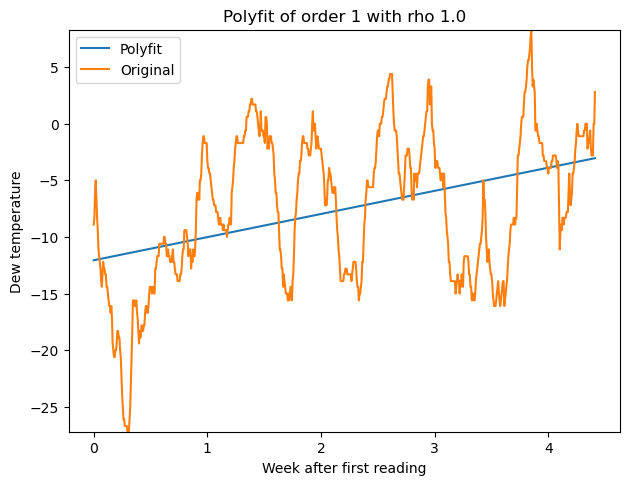

Error for order 1: 164.3059600633787


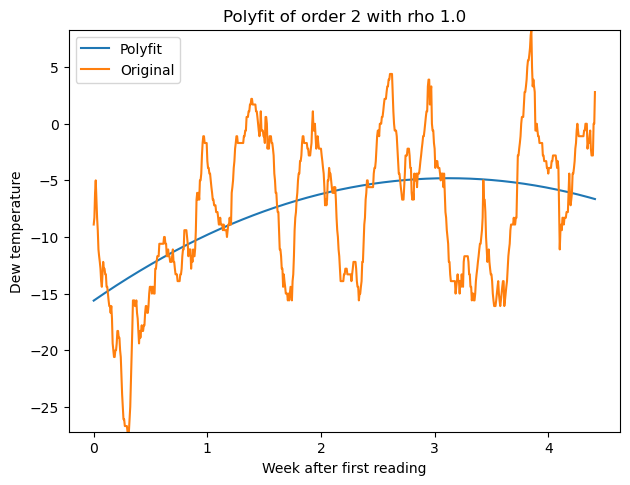

Error for order 2: 157.7551657576351


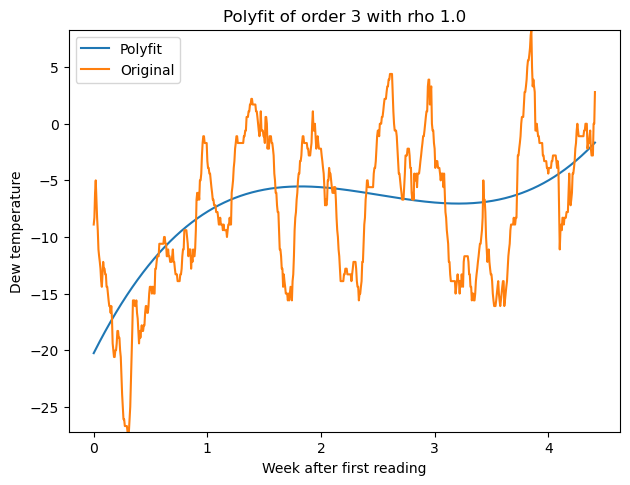

Error for order 3: 146.64958098154642


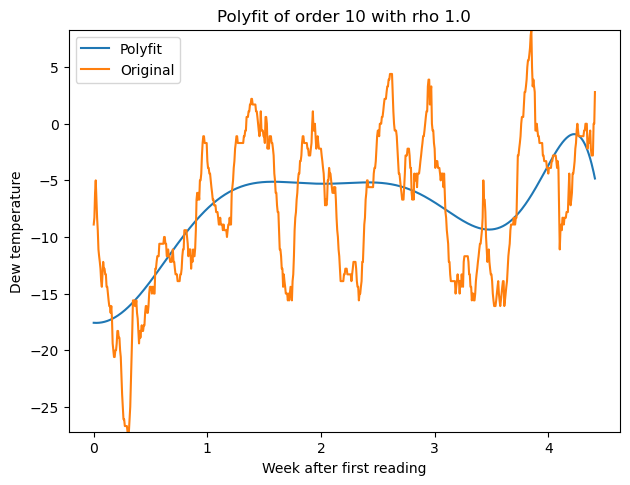

Error for order 10: 136.62125557837422


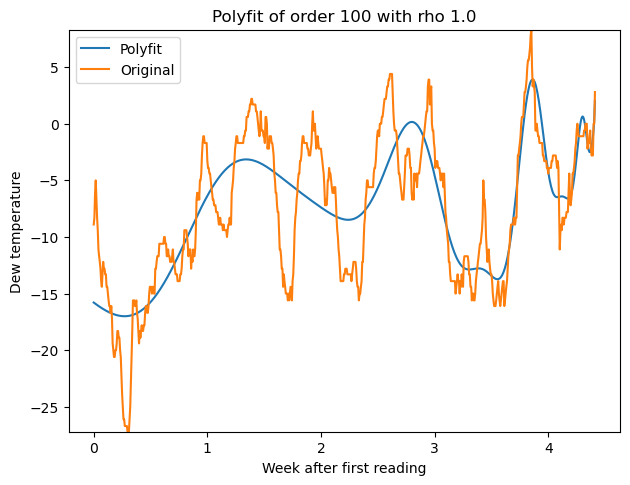

Error for order 100: 103.19645616274846
Lowest error: 103.19645616274846 at order 100


In [7]:
def plotPolyfitRidge(z, y, poly_order, rho):
    X = packX(z, poly_order)
    theta = solveRidgeRegressionSystem(X, y, rho)
    plt.plot(z, X @ theta)
    plt.plot(z, y)
    plt.xlabel('Week after first reading')
    plt.ylabel('Dew temperature')
    plt.legend(['Polyfit', 'Original'])
    plt.tight_layout()
    plt.title(f'Polyfit of order {poly_order} with rho {rho}')
    plt.ylim([min(y), max(y)])
    plt.show()
    return np.linalg.norm(X @ theta - y)

lowestError = float('inf')
lowestOrder = 0
for i in (1, 2, 3, 10, 100):
    error = plotPolyfitRidge(weeks_after_start, dewtemp, i, 1.0)
    if error < lowestError:
        lowestError = error
        lowestOrder = i
    print(f'Error for order {i}: {error}')

print(f'Lowest error: {lowestError} at order {lowestOrder}')

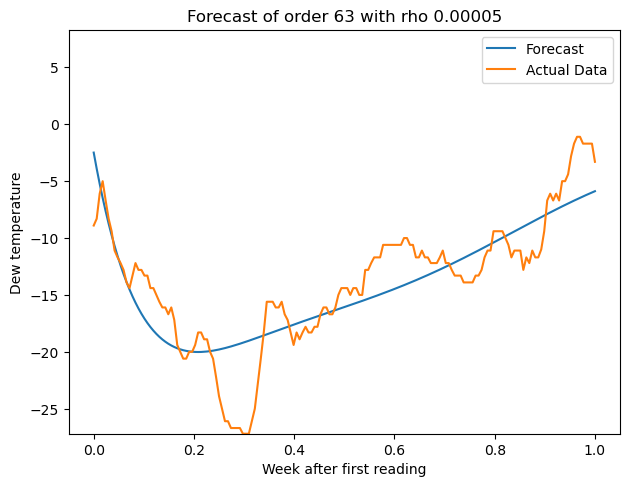

In [19]:
pVal = 63
rho = 0.00005
X = packX(weeks_after_start, pVal)
theta = solveRidgeRegressionSystem(X, dewtemp, rho)

forecasts = []
actualData = []

data_until_week_one = weeks_after_start[data['weeks'][0] <= 1.0]

for i in range(0, len(weeks_after_start)):
    if weeks_after_start[i] in data_until_week_one:
        forecasts.append(X[i] @ theta)
        actualData.append(dewtemp[i])
plt.plot(data_until_week_one, forecasts)
plt.plot(data_until_week_one, actualData)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
plt.legend(['Forecast', 'Actual Data'])
plt.tight_layout()
plt.title(f'Forecast of order {pVal} with rho 0.00005')
plt.ylim([min(dewtemp), max(dewtemp)])
plt.show()
